In [4]:
library(qvalue)
library(dplyr)
library(ggplot2)
library(cowplot)

In [2]:
# common genes, i.e. genes tested for all aggregations
df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods_and_bulk.csv")
common_genes = as.character(df_common_genes$gene)
length(common_genes)

[1] 12720

In [3]:
# highly variable genes (top 50% CV)
Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
G_file = read.csv(Giordanos_selection, sep = "\t")
nrow(G_file)
head(G_file,2)

[1] 21592

,gene,mean,std,CV,quartile_cv
2,ENSG00000227232,3.1805905,3.6232403,1.139172,2
3,ENSG00000243485,0.2003178,0.8649483,4.317881,3


In [6]:
#### load bulk results
##### a-bulk 
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"

In [7]:
# a-bulk lead SNP only
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
leads_all = leads_all[leads_all$feature_id %in% common_genes,]
leads_all$q_value = qvalue(leads_all$empirical_feature_p_value)$qvalues
leads_all_sign = leads_all[leads_all$q_value < 0.05,]

In [8]:
a_eqtls = unique(paste0(leads_all_sign$feature_id,"-",leads_all_sign$snp_id))

In [9]:
#### starting with 'dr' aggregations (all results)

In [10]:
### dr-mean
dir0 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/Run_Output_PCA20_88_log_TPM_scater_libsize_206/"
df0 = read.csv(paste0(dir0,"qtl_results_all.txt"), sep="\t")
df0 = df0[df0$feature_id %in% common_genes,]
head(df0,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000189114,19_45664218_A_G,5.062259e-11,0.947088,0.1441733,6.472391e-11,19,45682003,45685059,152,87,0.9763453,9.824455,19,45664218,G,1,0.1321839,0.3462471
ENSG00000189114,19_45665717_C_T,5.062259e-11,0.947088,0.1441733,6.472391e-11,19,45682003,45685059,152,87,0.9763453,9.824455,19,45665717,T,1,0.1321839,0.3462471


In [11]:
### dr-median
dir1 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/Run_Output_PCA20_88_log_TPM_scater_libsize_206/"
df1 = read.csv(paste0(dir1,"qtl_results_all.txt"), sep="\t")
df1 = df1[df0$feature_id %in% common_genes,]
head(df1,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170892,19_54697714_C_T,1.520556e-09,-0.5497819,0.09099081,3.029199e-05,19,54693789,54697585,152,87,0.5242628,74.25894,19,54697714,T,1,0.2183908,1
ENSG00000170892,19_54698976_C_T,1.520556e-09,-0.5497819,0.09099081,3.029199e-05,19,54693789,54697585,152,87,0.5242628,74.25894,19,54698976,T,1,0.2183908,1


In [12]:
### dr-sum
dir2 = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/"
df2 = read.csv(paste0(dir2,"qtl_results_all.txt"), sep="\t")
df2 = df2[df2$feature_id %in% common_genes,]
head(df2,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170892,19_54695163_T_C,7.804269e-15,-0.6292789,0.08098079,1.883289e-09,19,54693789,54697585,153,153,0.5916038,38.35838,19,54695163,C,1,0.2222222,1
ENSG00000170892,19_54696488_T_C,7.804269e-15,-0.6292789,0.08098079,1.883289e-09,19,54693789,54697585,153,153,0.5916038,38.35838,19,54696488,C,1,0.2222222,1


In [13]:
# then assess replication of bulk eQTL in single-cell aggregation results

In [14]:
# significant a-bulk replicated in sc-eqtl (dr-mean)
df0_bulk = inner_join(df0, leads_all_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df0_bulk_repl = df0_bulk[(df0_bulk$p_value.sc < 0.05 & 
         (df0_bulk$beta.sc*df0_bulk$beta.bulk)>0),]
a_eqtls_mean = unique(paste0(df0_bulk_repl$feature_id,"-",df0_bulk_repl$snp_id))

In [15]:
length(a_eqtls_mean)

[1] 3004

In [16]:
# significant a-bulk replicated in sc-eqtl (dr-median)
df1_bulk = inner_join(df1, leads_all_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1_bulk_repl = df1_bulk[(df1_bulk$p_value.sc < 0.05 & 
         (df1_bulk$beta.sc*df1_bulk$beta.bulk)>0),]
a_eqtls_median = unique(paste0(df1_bulk_repl$feature_id,"-",df1_bulk_repl$snp_id))

In [17]:
length(a_eqtls_median)

[1] 2384

In [18]:
# significant a-bulk replicated in sc-eqtl (dr-sum)
df2_bulk = inner_join(df2, leads_all_sign, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2_bulk_repl = df2_bulk[(df2_bulk$p_value.sc < 0.05 & 
         (df2_bulk$beta.sc*df2_bulk$beta.bulk)>0),]
a_eqtls_sum = unique(paste0(df2_bulk_repl$feature_id,"-",df2_bulk_repl$snp_id))

In [19]:
length(a_eqtls_sum)

[1] 2894

In [20]:
# next, define the different catagories:
# 1. bulk eQTL replicated in all three (dr-mean, dr-median and dr-sum)

In [21]:
eqtls1 = a_eqtls_mean[(a_eqtls_mean %in% a_eqtls_median) & (a_eqtls_mean %in% a_eqtls_sum)]
length(eqtls1)

[1] 1804

In [22]:
# 2. bulk eQTL replicated in dr-mean, dr-median but NOT dr-sum
# 3. bulk eQTL replicated in dr-mean, dr-sum but NOT dr-median
# 4. bulk eQTL replicated in dr-median, dr-sum but NOT dr-mean

In [23]:
eqtls2 = a_eqtls_mean[(a_eqtls_mean %in% a_eqtls_median) & !(a_eqtls_mean %in% a_eqtls_sum)]
eqtls3 = a_eqtls_mean[!(a_eqtls_mean %in% a_eqtls_median) & (a_eqtls_mean %in% a_eqtls_sum)]
eqtls4 = a_eqtls_median[!(a_eqtls_median %in% a_eqtls_mean) & (a_eqtls_median %in% a_eqtls_sum)]

In [24]:
length(eqtls2)
length(eqtls3)
length(eqtls4)

[1] 272

[1] 569

[1] 88

In [25]:
# 5. bulk eQTL replicated ONLY in dr-mean
# 6. bulk eQTL replicated ONLY in dr-median
# 7. bulk eQTL replicated ONLY in dr-sum

In [26]:
eqtls5 = a_eqtls_mean[!(a_eqtls_mean %in% a_eqtls_median) & !(a_eqtls_mean %in% a_eqtls_sum)]
eqtls6 = a_eqtls_median[!(a_eqtls_median %in% a_eqtls_mean) & !(a_eqtls_median %in% a_eqtls_sum)]
eqtls7 = a_eqtls_sum[!(a_eqtls_sum %in% a_eqtls_mean) & !(a_eqtls_sum %in% a_eqtls_median)]

In [27]:
length(eqtls5)
length(eqtls6)
length(eqtls7)

[1] 359

[1] 220

[1] 433

In [28]:
# 8. bulk eQTL replicated in none of the three

In [29]:
eqtls8 = a_eqtls[!(a_eqtls %in% a_eqtls_mean) & !(a_eqtls %in% a_eqtls_median) & !(a_eqtls %in% a_eqtls_sum)]
length(eqtls8)

[1] 5984

In [30]:
### Collect stats

In [31]:
df = leads_all_sign
df$eqtl = paste0(df$feature_id,"-",df$snp_id)
df_to_plot = df[df$eqtl %in% a_eqtls, c("feature_id","snp_id","eqtl","beta","q_value")]
nrow(df_to_plot)
head(df_to_plot,2)

[1] 9765

feature_id,snp_id,eqtl,beta,q_value
ENSG00000088038,19_54639868_G_A,ENSG00000088038-19_54639868_G_A,-0.1542810,0.0001765690
ENSG00000105605,19_54333563_C_A,ENSG00000105605-19_54333563_C_A,-0.1645107,0.0005959162


In [32]:
# define categories 
df_to_plot[df_to_plot$eqtl %in% eqtls1,"category"] = "all"
df_to_plot[df_to_plot$eqtl %in% eqtls2,"category"] = "no_sum"
df_to_plot[df_to_plot$eqtl %in% eqtls3,"category"] = "no_median"
df_to_plot[df_to_plot$eqtl %in% eqtls4,"category"] = "no_mean"
df_to_plot[df_to_plot$eqtl %in% eqtls5,"category"] = "only_mean"
df_to_plot[df_to_plot$eqtl %in% eqtls6,"category"] = "only_median"
df_to_plot[df_to_plot$eqtl %in% eqtls7,"category"] = "only_sum"
df_to_plot[df_to_plot$eqtl %in% eqtls8,"category"] = "none"
tail(df_to_plot)

,feature_id,snp_id,eqtl,beta,q_value,category
49831,ENSG00000163605,3_73135255_G_T,ENSG00000163605-3_73135255_G_T,-0.1560466,5.729286e-06,none
49832,ENSG00000169855,3_79376628_C_T,ENSG00000169855-3_79376628_C_T,0.1619283,2.122487e-04,none
49852,ENSG00000227124,3_75823968_C_T,ENSG00000227124-3_75823968_C_T,1.0307137,5.117737e-54,all
49881,ENSG00000242516,3_75726925_C_A,ENSG00000242516-3_75726925_C_A,-0.9191919,1.918925e-99,all
49889,ENSG00000242960,3_73071031_G_A,ENSG00000242960-3_73071031_G_A,-0.1111896,1.393913e-02,none
49897,ENSG00000244026,3_75487305_T_C,ENSG00000244026-3_75487305_T_C,0.4439374,1.471016e-15,all


In [33]:
### bulk stats
ab_stats_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/stats_HipSci_passQc.txt"
ab_stats = read.csv(ab_stats_filename, sep = "\t", row.names = 1)
head(ab_stats,2)

,FractionOfZero,MeanTPM_All,MeanTPM_nonZero,VarTPM_All,VarTPM_nonZero
ENSG00000223972,0.1919315,1.122548e-01,1.389175e-01,3.367321e-01,4.131240e-01
ENSG00000227232,0.0000000,2.146480e+126,2.146480e+126,3.768833e+255,3.768833e+255


In [34]:
ab_stats$feature_id = rownames(ab_stats)

In [35]:
nrow(df_to_plot)
df_to_plot0 = inner_join(df_to_plot, ab_stats, by = "feature_id")
nrow(df_to_plot0)

[1] 9765

[1] 9765

In [36]:
df_to_plot0$category = factor(df_to_plot0$category, levels = c("all", "no_sum", "no_median", "no_mean", 
                                                               "only_mean", "only_median","only_sum","none"))

In [37]:
gene_anno_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/Ensemble_75_Gene_Structures_Exon_Info.txt"
gene_anno = read.csv(gene_anno_filename, sep = "\t")
head(gene_anno,2)

Ensembl.Gene.ID,Ensembl.Transcript.ID,Ensembl.Protein.ID,Chromosome.Name,Gene.Start..bp.,Gene.End..bp.,Strand,Transcript.Start..bp.,Transcript.End..bp.,X5..UTR.Start,X5..UTR.End,X3..UTR.Start,X3..UTR.End,Exon.Chr.Start..bp.,Exon.Chr.End..bp.,Constitutive.Exon,Exon.Rank.in.Transcript,Ensembl.Exon.ID
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,66119285,66119659,NA,NA,66119285,66119659,0,1,ENSE00002619671
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,66298434,66298786,NA,NA,66298434,66298819,0,2,ENSE00002619173


In [38]:
df_genes = gene_anno[,c("Ensembl.Gene.ID","Gene.Start..bp.","Gene.End..bp.")]
colnames(df_genes) = c("feature_id","feature_start","feature_end")
df_genes = df_genes[-which(duplicated(df_genes$feature_id)),]
df_genes$feature_midpoint = df_genes$feature_start + 0.5*(df_genes$feature_end - df_genes$feature_start)
head(df_genes,2)

,feature_id,feature_start,feature_end,feature_midpoint
1,ENSG00000261657,66119285,66465398,66292342
48,ENSG00000223116,23551994,23552136,23552065


In [39]:
nrow(df_to_plot0)
df_to_plot1 = inner_join(df_to_plot0, df_genes, by = "feature_id")
nrow(df_to_plot1)

[1] 9765

[1] 9765

In [40]:
df_to_plot1$snp_pos = matrix(unlist(strsplit(as.character(df_to_plot1$snp_id),"_")), ncol = 4, byrow = T)[,2]
df_to_plot1$dist = as.numeric(df_to_plot1$feature_midpoint) - as.numeric(df_to_plot1$snp_pos)
head(df_to_plot1,2)

feature_id,snp_id,eqtl,beta,q_value,category,FractionOfZero,MeanTPM_All,MeanTPM_nonZero,VarTPM_All,VarTPM_nonZero,feature_start,feature_end,feature_midpoint,snp_pos,dist
ENSG00000088038,19_54639868_G_A,ENSG00000088038-19_54639868_G_A,-0.1542810,0.0001765690,no_sum,0,6.30071e+210,6.30071e+210,Inf,Inf,54641444,54659419,54650432,54639868,10563.5
ENSG00000105605,19_54333563_C_A,ENSG00000105605-19_54333563_C_A,-0.1645107,0.0005959162,none,0,Inf,Inf,NA,NA,54412589,54447195,54429892,54333563,96329.0


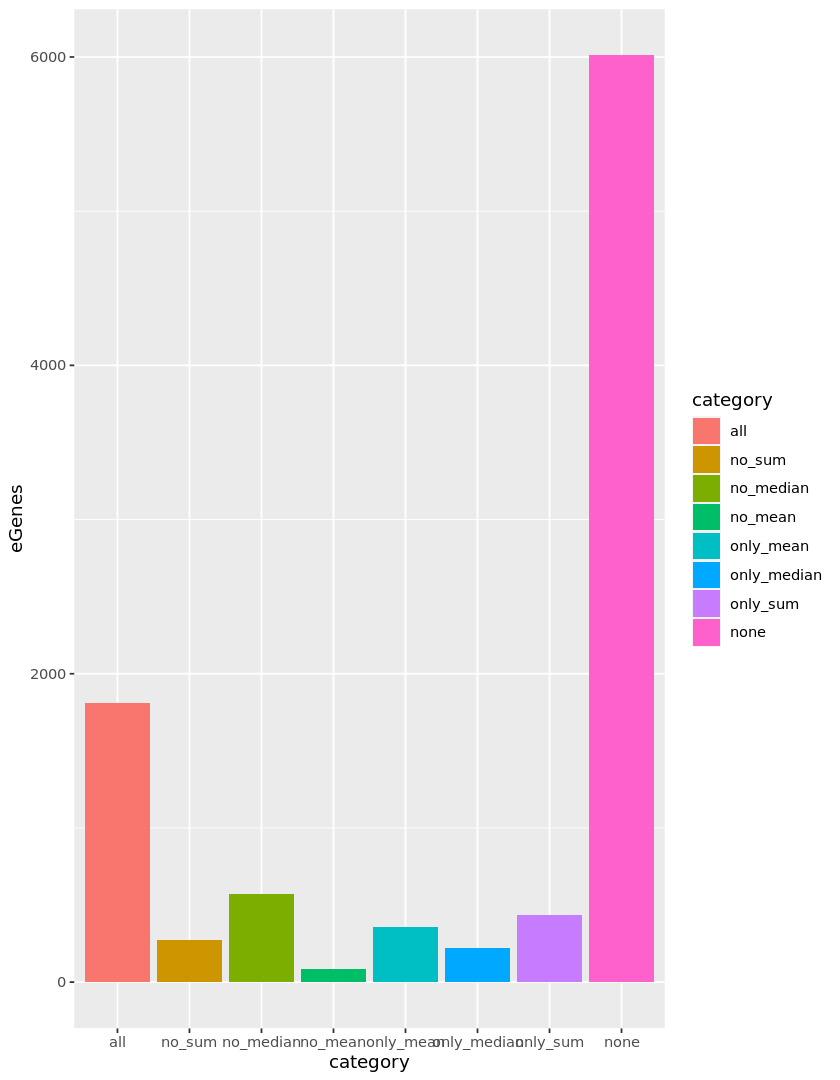

In [45]:
df_to_plot0 %>% group_by(category) %>% summarise(eGenes = n()) %>%
    ggplot(aes(x = category, y = eGenes, fill = category)) + geom_bar(stat="identity") 

In [42]:
options(repr.plot.width = 7, repr.plot.height = 9)
p1 = df_to_plot0 %>% group_by(category) %>% summarise(eGenes = n()) %>%
    ggplot(aes(x = category, y = eGenes, fill = category)) + geom_bar(stat="identity") + theme_classic() + xlab("") + theme(legend.position = "none")
    +geom_errorbar(aes(ymin=eGenes-stdv, ymax=m+stdv), width=.2,
                position=position_dodge(.9)) +
p2 = ggplot(df_to_plot0, aes(x = category, y = log2(MeanTPM_All+1), fill= category)) + geom_violin(colour=NA) + geom_boxplot(width=0.1) + theme_classic() + xlab("") + theme(legend.position = "none")
p3 = ggplot(df_to_plot0, aes(x = category, y = log2(VarTPM_All+1),fill= category)) + geom_violin(colour=NA) + geom_boxplot(width=0.1) + theme_classic() + xlab("") + theme(legend.position = "none")
p4 = ggplot(df_to_plot0, aes(x = category, y = log2(abs(beta)+1), fill= category)) + geom_violin(colour=NA) + geom_boxplot(width=0.1) + theme_classic() + xlab("") + theme(legend.position = "none")
p5 = ggplot(df_to_plot1, aes(x = category, y = log2(abs(dist)+1), fill= category)) + geom_violin(colour=NA) + geom_boxplot(width=0.1) + theme_classic() + theme(legend.position = "none")

plot_grid(p1,p2,p3,p4,p5, ncol=1) 
# plot_grid(p1,p4,ncol=1) 

ERROR: Error in +geom_errorbar(aes(ymin = eGenes - stdv, ymax = m + stdv), width = 0.2, : object 'eGenes' not found


In [ ]:
type.col <- c(only_mean = "#375e97", no_mean = "#ee7733", only_median = "#fb6542", no_median="#228833", 
              only_sum = "#ffbb00", no_sum="#AA3377", all="gray", none="gray80")

In [ ]:
plot_grid(p1+scale_fill_manual(values = type.col),
          p2+scale_fill_manual(values = type.col),
          p3+scale_fill_manual(values = type.col),
          p4+scale_fill_manual(values = type.col),
          p5+scale_fill_manual(values = type.col), ncol=1) 

In [46]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [47]:
pdf(paste0(fig_dir,"eqtl_properties_all_aggregations.pdf"), width=7, height=9)
plot_grid(p1+scale_fill_manual(values = type.col),
          p2+scale_fill_manual(values = type.col),
          p3+scale_fill_manual(values = type.col),
          p4+scale_fill_manual(values = type.col),
          p5+scale_fill_manual(values = type.col), ncol=1) 
dev.off()

Warning message:
“Removed 3260 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3260 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5336 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 5336 rows containing non-finite values (stat_boxplot).”

png 
  2